In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\Hxtreme\Downloads\archive (1)\Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
data.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

There is no purpose in using 'cutomerID', so drop it.

In [6]:
data.drop('CustomerID',axis=1,inplace=True)


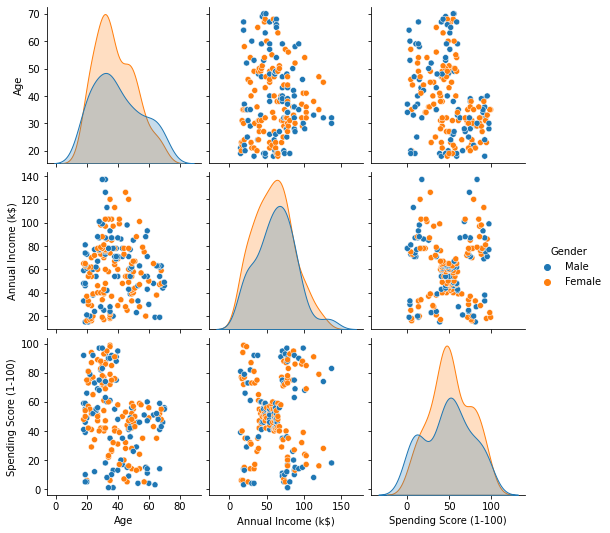

In [7]:
# correlate between bivariant
sns.pairplot(data,hue='Gender')

Note:

From the graph, we can see some of the relation between each variables that gives information on data and colour denotes male and female.  

<AxesSubplot: xlabel='Gender', ylabel='Count'>

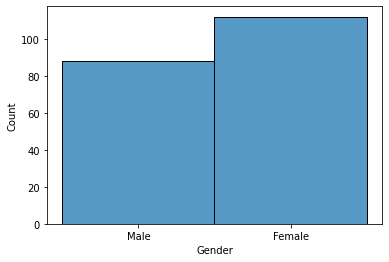

In [8]:
sns.histplot(data=data['Gender'])

* Female buyer are more than male.
* During clustering this gender column will lead data to fall in linear line, so clustering not able to form.
* Thus we remove 'Gender' column.

In [9]:
del data["Gender"]

In [10]:
data.rename(columns={"Annual Income (k$)":"Annual Income","Spending Score (1-100)":"Spending Score"},inplace = True)

# KMeans Clustering 

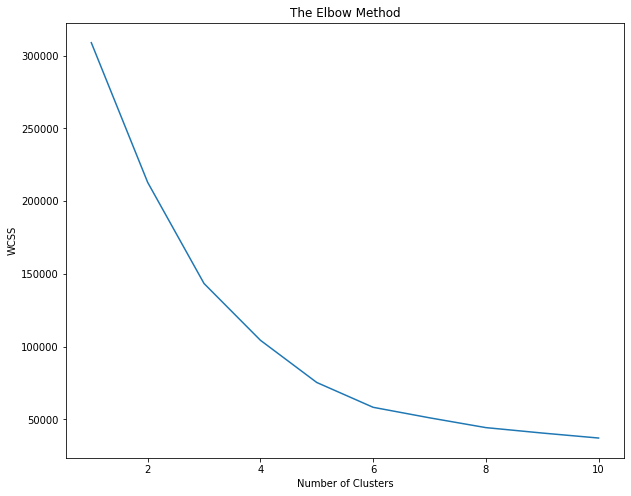

In [12]:
#Elbow method
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS= []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(data)
    WCSS.append(clf.inertia_) # For each k, calculate the total within-cluster sum of square (wss)
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()


The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters. we see a good curve and a perfect number is not findable. So we choose either 5, 6 or 7.

For n_clusters = 2 The average silhouette_score is : 0.293166070535953
For n_clusters = 3 The average silhouette_score is : 0.3839349967742105
For n_clusters = 4 The average silhouette_score is : 0.40546302077733304
For n_clusters = 5 The average silhouette_score is : 0.44428597560893024
For n_clusters = 6 The average silhouette_score is : 0.4523443947724053
For n_clusters = 7 The average silhouette_score is : 0.4412807576186172
For n_clusters = 8 The average silhouette_score is : 0.4280971079746162


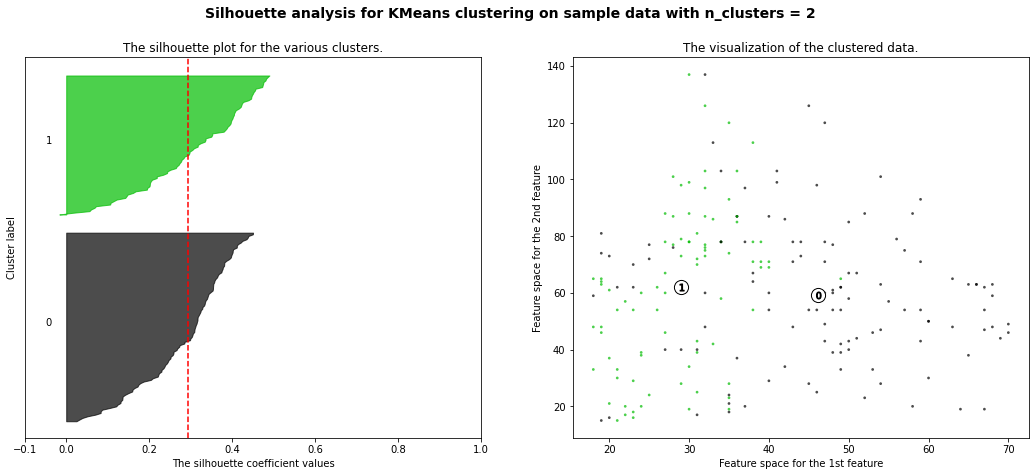

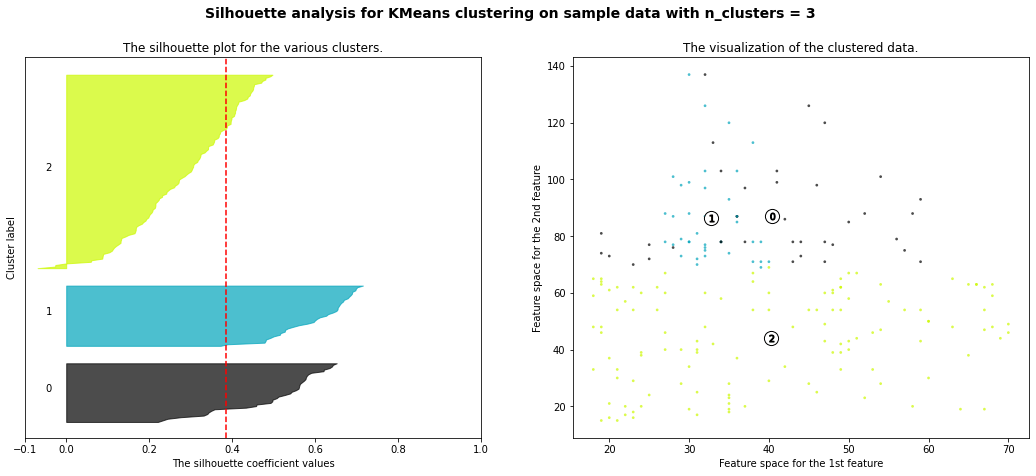

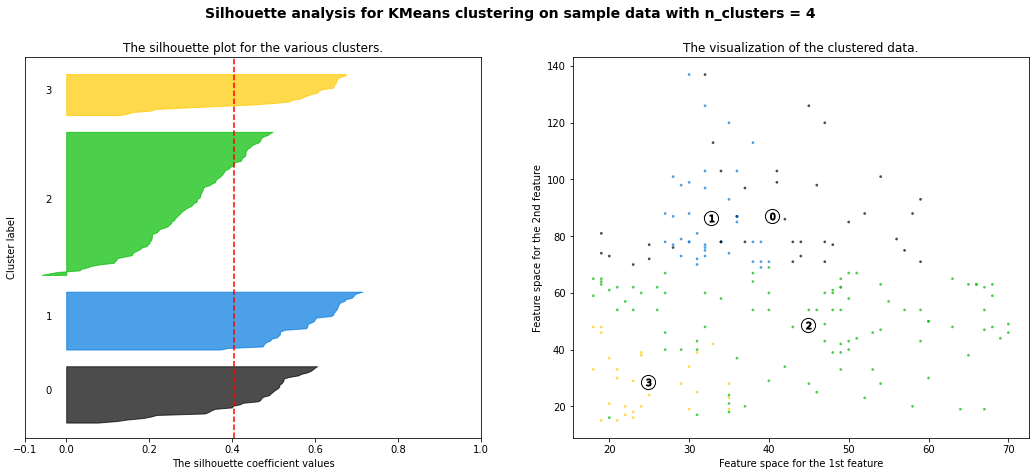

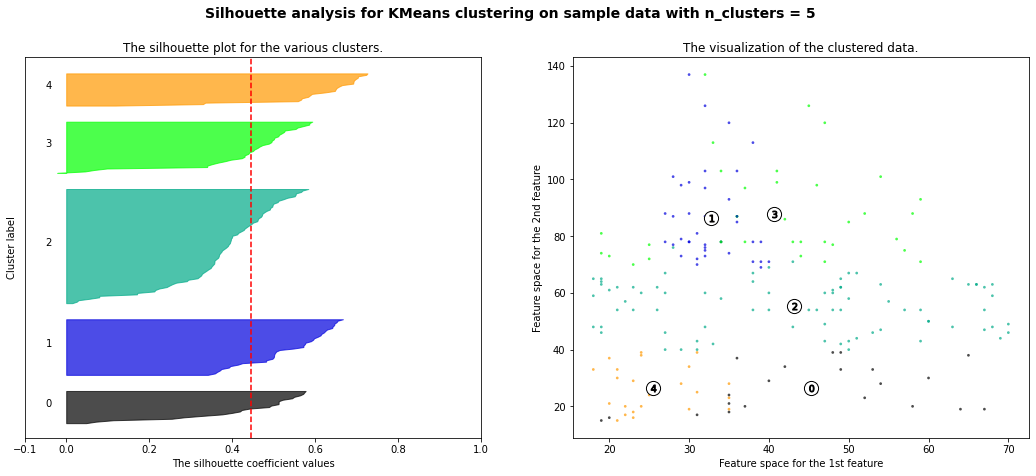

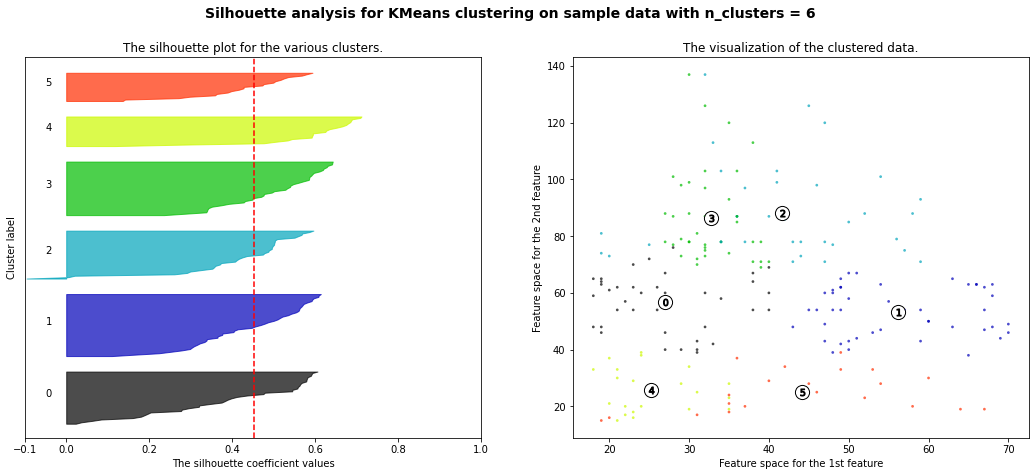

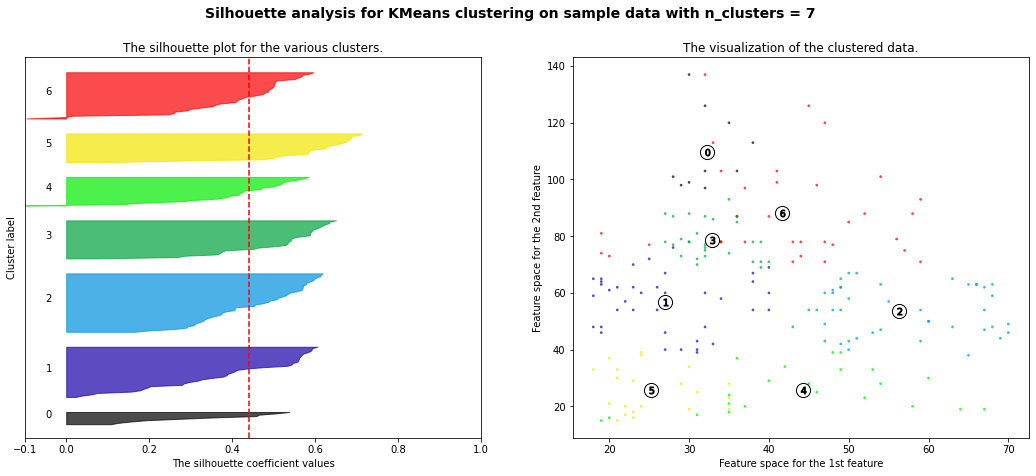

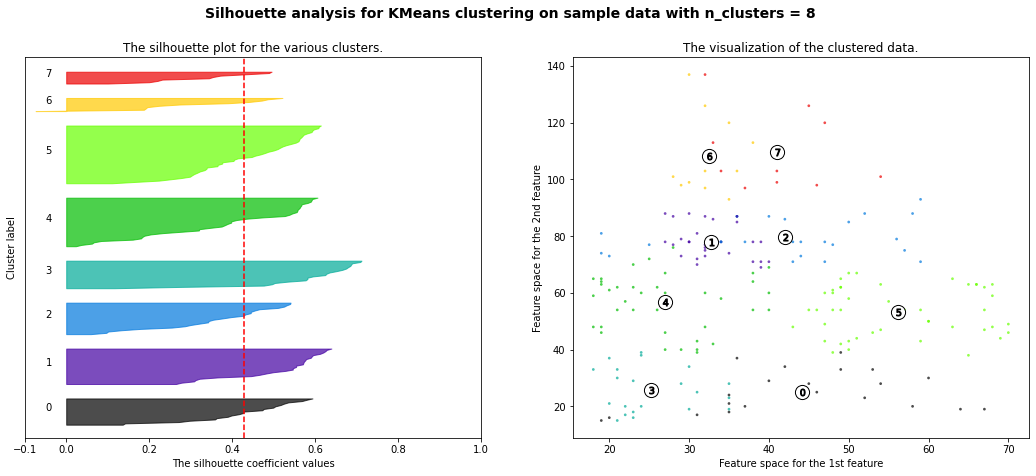

In [13]:
# Average silhouette method,it measures the quality of a clustering

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm


X =data
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,random_state=0)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X.iloc[:, 0], X.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

* From the above graph, 6 cluster shows good silhouette_score but one of the cluster have poor negatives.
* Then second highest score is 5 cluster and it have less negatives.
* FINALLY, 5 cluster is good fit.

In [14]:
clf= KMeans(n_clusters= 5)
y_mean= clf.fit_predict(data)
new_data= pd.Series(y_mean)
data['clust'] = new_data

Text(0.5, 1.0, 'Clusters using KMeans')

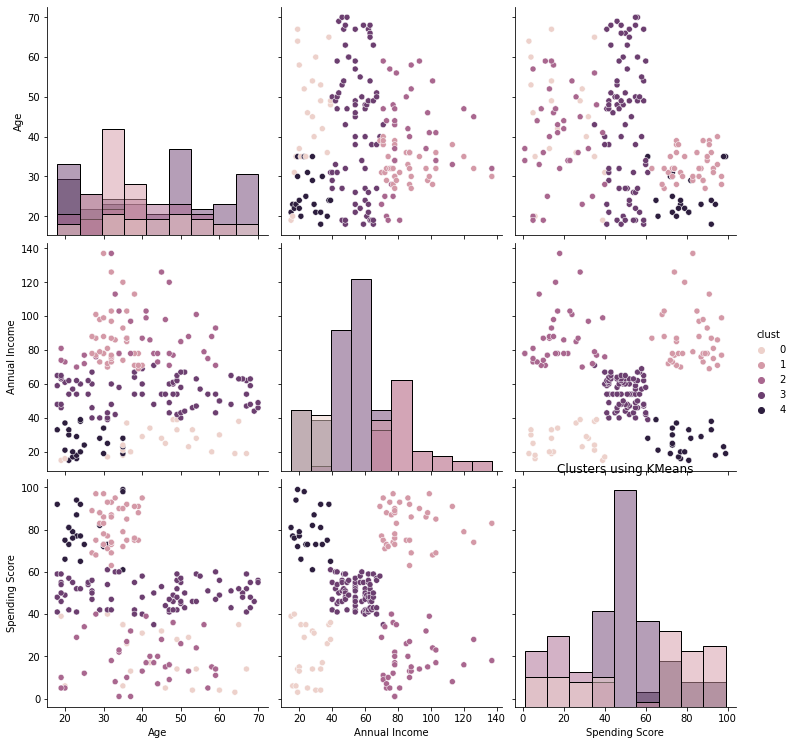

In [15]:
sns.pairplot(data= data, hue ="clust", diag_kind="hist", height=3.5)
plt.title('Clusters using KMeans')   

* Annual Income and Spending score have good clustering.
* Remaining features have overlapping data while clustering.

In [16]:
from sklearn.metrics import silhouette_score
silhouette_score(data, y_mean)

0.4451590335884062

# DBSCAN Clustering

In [17]:
df = pd.read_csv(r"C:\Users\Hxtreme\Downloads\archive (1)\Mall_Customers.csv")
data = df.iloc[:,2:]
data

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [18]:
# Normalization is to bring the data to a scale of [0,1]. This can be accomplished by (x-xmin)/(xmax-xmin).
from sklearn.preprocessing import MinMaxScaler
trans= MinMaxScaler()
df_norm= pd.DataFrame(trans.fit_transform(data))
df_norm

,0,1,2
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959
...,...,...,...
195,0.326923,0.860656,0.795918
196,0.519231,0.909836,0.275510
197,0.269231,0.909836,0.744898
198,0.269231,1.000000,0.173469


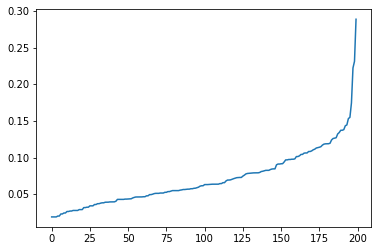

In [19]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_norm)
distances, indices = nbrs.kneighbors(df_norm)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

The optimal value for epsilon will be found at the point of maximum curvature. So we choose 0.10 or 0.15

In [20]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.15, min_samples=5)
dbscan.fit(df_norm)         

DBSCAN(eps=0.15)

In [21]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster']) 
data_1= pd.concat([data,cl],axis=1)
data_1

,Age,Annual Income (k$),Spending Score (1-100),cluster
0,19,15,39,-1
1,21,15,81,0
2,20,16,6,-1
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,-1
196,45,126,28,-1
197,32,126,74,-1
198,32,137,18,-1


In [22]:
print("There are totally",cl.nunique().values,"clusters")

There are totally [4] clusters


Text(0.5, 1.0, 'Clusters using DBScan')

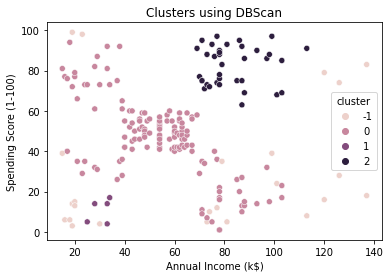

In [23]:
sns.scatterplot(data = data_1,x="Annual Income (k$)",y ="Spending Score (1-100)",hue="cluster")
plt.title('Clusters using DBScan')   

In [24]:
from sklearn.metrics import silhouette_score
silhouette_score(data, cl)

0.18299789508738093

* Silhouette_score:
           DBSCAN = 0.1829
           KMeans = 0.4450
* DBSCAN doesn't improve the silhouette score. So KMEANS will be a good model.